# Using user defined annotations and trajectory trees

CAPITAL can use annotations and trajectory trees that are calculated in other methods.  

In [1]:
import capital as cp
import scanpy as sc
import networkx as nx
import pandas as pd
import numpy as np

In this tutorial, we will use the same datasets as previous tutorial.  

In [2]:
adata1 = cp.dataset.setty19("../data/capital_dataset/setty19_capital.h5ad")

Download completed. The dataset is saved in ../data/capital_dataset/setty19_capital.h5ad


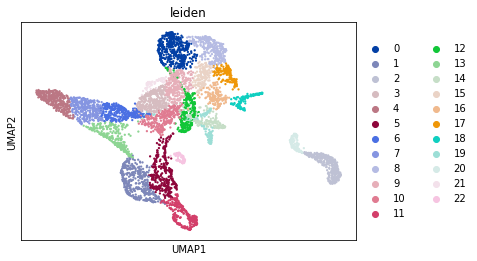

In [3]:
sc.pl.umap(adata1, color="leiden")

## Annotating the clusters
Annotate clusters from their gene expressions.  

In [4]:
annotation1 = {'4': 'HSC', '7': 'HSC',
        '6': 'MPP', 
        '13': 'MEP', '1': 'MEP', '5': 'MEP',
        '22': 'Mega',
        '11': 'Ery',
        '3': 'GMP1','10': 'GMP1', '12': 'GMP1', '21': 'GMP1',
        '9': 'GMP2', '15': 'GMP2',
        '14': 'CLP', '19': 'CLP', '20': 'CLP', '2': 'CLP',
        '18': 'DC', '17': 'DC', '16': 'DC',
        '0': 'Mono', '8': 'Mono'
    }

Add new annotations to the anndata.obs as "new_cluster."  

In [5]:
adata1.obs["new_cluster"] = adata1.obs["leiden"]
adata1.obs["new_cluster"] = adata1.obs["new_cluster"].astype(object).replace(annotation1).astype('category')

In [6]:
adata1.obs["new_cluster"]

index
Run4_120703408880541     MEP
Run4_120703409056541     HSC
Run4_120703409580963    Mono
Run4_120703423990708    Mono
Run4_120703424252854     CLP
                        ... 
Run5_241114589051630     Ery
Run5_241114589051819    GMP1
Run5_241114589128940     MEP
Run5_241114589357942     Ery
Run5_241114589841822     CLP
Name: new_cluster, Length: 5780, dtype: category
Categories (10, object): ['CLP', 'DC', 'Ery', 'GMP1', ..., 'MEP', 'MPP', 'Mega', 'Mono']

In [7]:
adata1.obs["new_cluster"].cat.categories

Index(['CLP', 'DC', 'Ery', 'GMP1', 'GMP2', 'HSC', 'MEP', 'MPP', 'Mega',
       'Mono'],
      dtype='object')

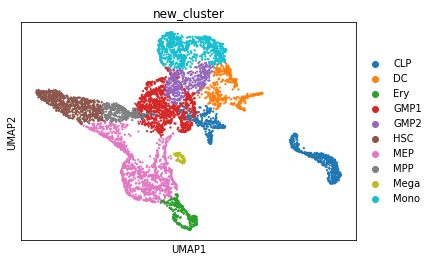

In [8]:
sc.pl.umap(adata1, color="new_cluster")

## Importing annotations from Numpy array
If you have the annotations as Numpy array, you can simply add those data to anndata.obs.

In [9]:
# creating random annotation for demo. The numbers don't have any meanings.
ndarray_demo_annotation = np.random.randint(low=0, high=10, size= adata1.obs.shape[0]).astype(int)
ndarray_demo_annotation

array([5, 3, 8, ..., 6, 5, 7])

Add the array to anndata.obs.  

In [10]:
adata1.obs["demo_annotation"] = ndarray_demo_annotation

## Computing a trajectory tree
If you have annotations of the cells but not a trajectory tree,   
run cp.tl.trajectory_tree() as below and skip the next section (Drawing the trajectory tree).  
Pass the name of the annotations to argument "groupby."   

In [11]:
cp.tl.trajectory_tree(adata1, root_node="HSC", groupby="new_cluster")

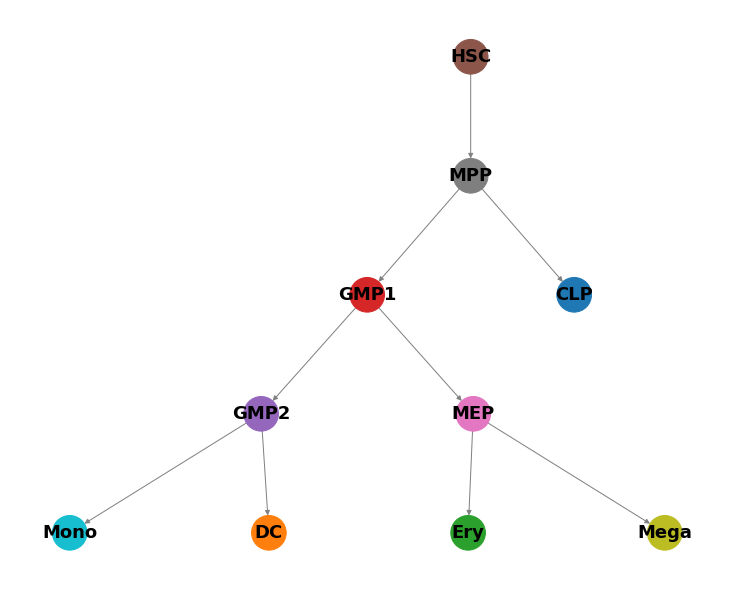

In [12]:
cp.pl.trajectory_tree(adata1)

## Drawing the trajectory tree from your analysis or other methods  
CAPITAL accepts the trajectory tree as a directed graph from [Networkx](https://networkx.org).  
A tree can be written like below or converted from another data format like an adjacency matrix.  
Please read [networkx's directed graph page](https://networkx.org/documentation/stable/reference/classes/digraph.html) for more information.  
The name of nodes in the tree must match the annotation that you defined.

In [13]:
tree1 = nx.DiGraph()
tree1.add_edges_from(
    [("HSC", "MPP"), ("MPP", "MEP"),("MEP","Mega"),("MEP","Ery"),
     ("MPP","CLP"),("MPP","GMP1"),("GMP1","GMP2"),("GMP2","DC"),("GMP2","Mono")]
)

Pass the AnnData object, the root name in the trajectory and the directed graph defined above.  

In [14]:
cp.tl.trajectory_tree(adata1, root_node="HSC", groupby="new_cluster", tree=tree1)

Draw the trajectory tree you defined.

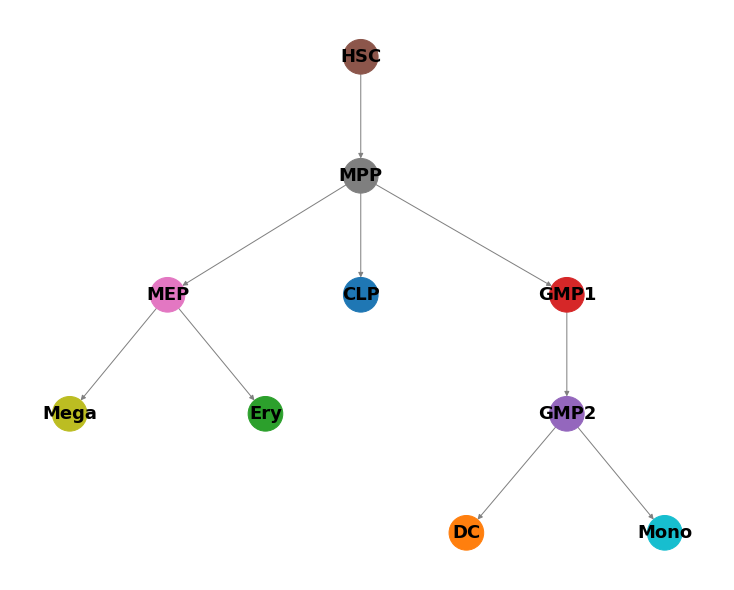

In [15]:
cp.pl.trajectory_tree(adata1)

Apply the same process to one or more datasets that you would like to align.

In [16]:
adata2 = cp.dataset.velten17("../data/capital_dataset/velten17_capital.h5ad")

Download completed. The dataset is saved in ../data/capital_dataset/velten17_capital.h5ad


In [17]:
annotation2 = {
    '0': 'HSC', '1': 'HSC',
    '17': 'MPP', '14': 'MPP',
    '2': 'Pre-B', '20': 'Pre-B', '15': 'Pre-B',
    '12': 'MEP', '19': 'MEP', '18': 'MEP',
    '6': 'Ery', '9': 'Ery',
    '13': 'Mega',
    '8': 'GMP', '5': 'GMP', '10': 'GMP', '21': 'GMP',
    '16': 'Neutro', '3': 'Neutro', '7': 'Neutro',
    '11': 'Mono/DC',
    '4': 'Eo/Baso/Mast'
}

In [18]:
adata2.obs["new_cluster"] = adata2.obs["leiden"]
adata2.obs["new_cluster"] = adata2.obs["new_cluster"].astype(object).replace(annotation2).astype('category')

In [19]:
tree2 = nx.DiGraph()
tree2.add_edges_from(
    [("HSC", "MPP"), ("MPP", "MEP"),("MEP","Mega"),("MEP","Ery"),
     ("MPP","Pre-B"),("MPP","GMP"),("GMP","Mono/DC"),("GMP","Neutro"),("GMP","Eo/Baso/Mast")]
)

In [20]:
cp.tl.trajectory_tree(adata2, root_node="HSC", groupby="new_cluster", tree=tree2)

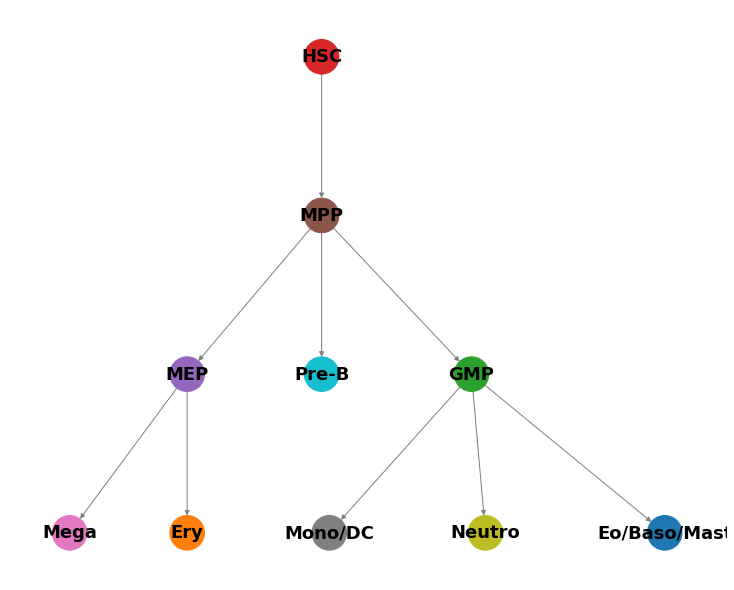

In [21]:
cp.pl.trajectory_tree(adata2)

## Aligning trajectory trees

In [22]:
cdata = cp.tl.tree_alignment(adata1, adata2, num_genes1=2000, num_genes2=2000)

Calculating tree alignment
411 genes are used to calculate cost of tree alignment.

Calculation finished.


Draw the tree alignment result.

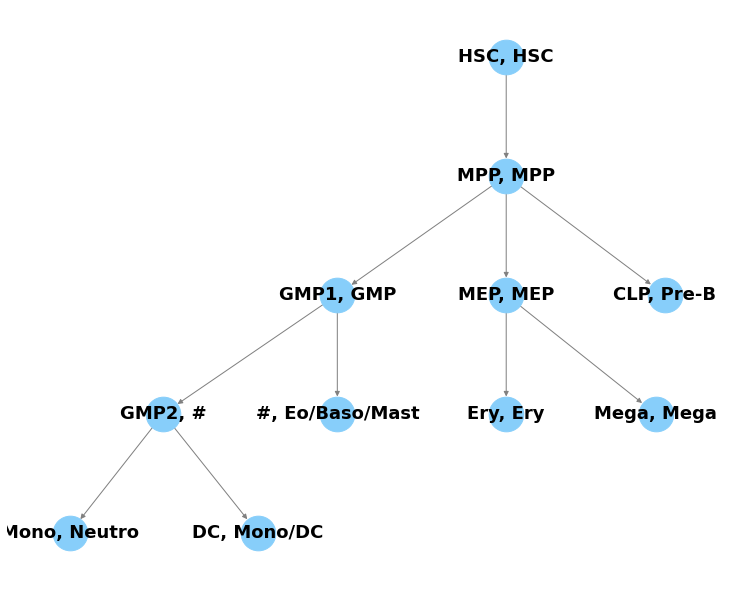

In [23]:
cp.pl.tree_alignment(cdata)

See the list of the alignment names by alignmentlist.

In [24]:
cdata.alignmentlist

[('alignment000',
  ['HSC', 'MPP', 'GMP1', '#'],
  ['HSC', 'MPP', 'GMP', 'Eo/Baso/Mast']),
 ('alignment001',
  ['HSC', 'MPP', 'GMP1', 'GMP2', 'Mono'],
  ['HSC', 'MPP', 'GMP', '#', 'Neutro']),
 ('alignment002',
  ['HSC', 'MPP', 'GMP1', 'GMP2', 'DC'],
  ['HSC', 'MPP', 'GMP', '#', 'Mono/DC']),
 ('alignment003', ['HSC', 'MPP', 'MEP', 'Ery'], ['HSC', 'MPP', 'MEP', 'Ery']),
 ('alignment004',
  ['HSC', 'MPP', 'MEP', 'Mega'],
  ['HSC', 'MPP', 'MEP', 'Mega']),
 ('alignment005', ['HSC', 'MPP', 'CLP'], ['HSC', 'MPP', 'Pre-B'])]